# 1. Hamming Code
In dieser Aufgabe werden wir mithilfe von mehreren Teilfunktionen den Ablauf des Hamming-Codes zur Fehlerkorrektur nachstellen.
Zu beginn starten wir mit einem Array von Integern die eine Binärzahl representieren:


Um an einem späteren Zeitpunkt die benötigten Parity-Bits hinzufügen zu können muss an jeder $2^n$ten Stelle Platz gemacht werden. Dieser Platzhalter kann beispielsweise eine **2** sein (diese Zahl müss später bein einfügen der Parity-Bits unterschieden werden können, also nicht 1 oder 0).

> **Aufgabe**: Die erste Funktion überprüft ob eine Zahl **n** eine Zweierpotenz (2 hoch einer ganzen Zahl) ist. Diese Funktion gibt `True` zurück falls dies zutrifft und `False` wenn nicht.

In [33]:
def isPowerOfTwo(n):
    if n==0:
        return True #force true
    
    if n==1:
        return True # 2 high 0 is 1 so force True
    a = 2
    while a<n: 
        a = a*2
        if a == n:
            return True
        if a>n:
            return False

#Tests
print(isPowerOfTwo(0) == True)
print(isPowerOfTwo(1) == True)
print(isPowerOfTwo(3) == False)
print(isPowerOfTwo(8) == True)
print(isPowerOfTwo(12) == False)

True
True
True
True
True


Um diese Platzhalter im Array an die richtige Stelle zu setzen verwenden wir die vorher erstellte Funktion: **isPowerOfTwo(n)**.

> **Aufgabe**: Das Ziel dieser Funktion ist es an jeder $2^n$ten Stelle im Array eine *2* einzufügen. Da von rechts nach links gerechnet wird, ist es von Vorteil das Array umzukehren. Mit **_list.reverse()_** kann eine Liste umgedreht werden und mit **_list.append(item)_** kann ein Element einer Liste angehängt werden. Zum Beispiel wird aus: $$[1, 0, 1, 1, 0, 1, 0, 0]  \rightarrow  [0, 0, 1, 0, 1, 1, 0, 1] \rightarrow [2, 2, 0, 2, 0, 1, 0, 2, 1, 1, 0, 1]$$

In [34]:
def fillBits(data):
    #dein code
    #print(data, "= given data")
    data.append(2) #append always add at last spot of list
    data.append(2)
    data.reverse() #preps the first two since they are always picked to be 2
    adder = 2 #adder starts at 2 since there are already 2 in the list
    counter2 = 0 #adder is the variable to count the diffrence for when a new 2 gets added into list
    final = data[0:2] #the first two from the modified list gets copied to final
    done = False #just for running the loop

    #print(data, "= modified data")
    while done == False:
        
        adder += 1 #increment each runthrough
        if isPowerOfTwo(adder) == True: #length addition to it still missing 
            final.append(2)
            counter2 += 1 #adding 2 into the list and incrementing the gap from the original list that gets created
        else:
            final = final + data[adder-1-counter2:adder-counter2]
            #adds the numbers inbetween the 2 (remember the gap that the 2 create)

        if adder >= len(data) + counter2: #if the length of the data + the diffrence is bigger it should return it to be checked
            #print(final, "= finished final")
            return final

    #heres the thought I could make it so it takes until every ^2 and between adds in a while loop the number inbetween
    #and if it corsses the length of it (careful of the 2 implementing) it returns the value

#Tests
print(fillBits([1,0,1,1,0,1,0,0]) == [2, 2, 0, 2, 0, 1, 0, 2, 1, 1, 0, 1])
print(fillBits([0,0,0,1]) == [2, 2, 1, 2, 0, 0, 0])

True
True


## Paritätsbits Variante 1
Die folgenden Funktionen berechnen die benötigten Paritätsbits. Zu Beginn werden alle Stellen der zuvor berechneten Liste wo sich eine **1** befindet erfasst. Jede Stelle wird daraufhin in ihre binäre Schreibweise umgeschrieben und mit den anderen Indexen addiert (**ohne Übertrag**). Daraus resultieren die Paritätsbits der Liste.

> **Aufgabe**: Diese Funktion erhält eine Liste und gibt die Indexe aller **1**sen als Liste zurück (in aufsteigender Reihenfolge).
$$[2, 2, 0, 2, 0, 1, 0, 2, 1, 1, 0, 1] \rightarrow [6, 9, 10, 12]$$

In [35]:
def getIndicesOfOnes(lst):
    #dein code
    newList = [] #a new list to give back later
    for i in range (len(lst)): #i in range is like for. I is a countervariable and in range just means basicly (i<len(lst))
        if lst[i] == 1: #the question is to search where a 1 is in the list
            newList.append(i+1) #i starst at 0 so you have to add 1. This appends the number that results from it

    return newList

#Tests
print(getIndicesOfOnes([2, 2, 0, 2, 0, 1, 0, 2, 1, 1, 0, 1]) == [6, 9, 10, 12])
print(getIndicesOfOnes([2, 2, 1, 2, 1, 0, 0]) == [3, 5])

True
True


Im nächsten Schritt wird jede Stelle wo eine **1** vorgekommen ist binär miteinander addiert (und zwar ohne Übertrag).
> **Aufgabe**: Diese Funktion bekommt eine Liste mit Indexen, welche binär addiert werden. Zum Beispiel: $$[6, 9, 10, 12] \rightarrow 0110 + 1001 + 1010 + 1100  \rightarrow  0b1001$$ Diese Funktion gibt den Wert als `Binärzahl` zurück. Mit der Funktion **bin(Zahl)** kann eine Zahl in ihre Binärdarstellung umgewandelt werden. 

_Tipp: mit XOR (^) kann man Zahlen ohne Übertrag addieren._

In [36]:
def addWithoutCarry(arr):
    #dein code
    final = 0
    
    for i in range(len(arr)):
        final = arr[i]^final #  ^calculates things in binary 
    #print(bin(final))
    return bin(final)

#Tests
print(addWithoutCarry([6, 9, 10, 12]) == '0b1001')
print(addWithoutCarry([3, 5]) == '0b110')

True
True


Die Funktion **addWithoutCarry(arr)** gibt eine Binärzahl wie zum Beispiel `0b1001` zurück. Die Aufgabe der nächsten Funktion ist es das `0b` am Beginn der loszuwerden und die übrigen "bits" in Form einer Liste zu erhalten.

> **Aufgabe**: Hilfreich ist es den Binärwert **b** mit der Funktion **str(b)** zu einem `String` umzuwanden. Zum Beispiel wird aus:
$$ 0b1001 \rightarrow [1, 0, 0, 1]$$

In [37]:
def binToIntList(b):
    #dein code
    newList = [] #creates a new list for it to be converted

    for i in range (len(b)-2): #-2 since the 0b has to be ignored
        newList.append(int(b[i+2])) #would convert to a char but the int() function converts it to an int also +2 cuz 0b
    #print(newList)
    return newList

#Tests
print(binToIntList('0b1001') == [1, 0, 0, 1])
print(binToIntList('0b110') == [1, 1, 0])

True
True


## Zusammensetzen
Diese letzte Funktion um den Hamming Code zu bestimmen fügt die berechneten Paritätsbits an den Stellen (die mit einer **2** gekennzeichnet sind) ein.

> **Aufgabe**: Beim durchiterieren der Liste **lst** wird überprüft ob das aktuelle Element eine **2** (also Platzhalter für ein Paritätsbit) ist. Falls das zutrifft, wird dieses mit dem ersten Paritätsbit aus der Liste **bts** ausgetauscht. Zum Beispiel:
$$[2, 2, 0, 2, 0, 1, 0, 2, 1, 1, 0, 1] [1, 0, 0, 1] \rightarrow [1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1]$$
ein weiters Beispiel:
$$[2, 2, 1, 2, 1, 0, 0] [0, 1, 1] \rightarrow [0, 1, 1, 1, 1, 0, 0]$$
**Falls nicht genügend Paritätsbits verfügbar sind soll eine 0 eingefügt werden.** Das kann auftreten wenn zum Beispiel 0001 als Paritätsbis herauskommen und diese als 0b1 angegeben werden.

In [38]:
def fillParityBits(lst, bts):
    #dein code
    counter = 0
    two_counter = 0 

    for i in range (len(lst)):
        if lst[i] == 2:
            two_counter += 1
            
            if len(bts)>= two_counter: #decide that it only adds
                lst[i] = bts[counter]
            else:
                lst[i] = 0
            counter += 1
    #print(lst)
    return lst

#Tests
print(fillParityBits([2, 2, 0, 2, 0, 1, 0, 2, 1, 1, 0, 1], [1, 0, 0, 1]) == [1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1])
print(fillParityBits([2, 2, 1, 2, 1, 0, 0], [0, 1, 1]) == [0, 1, 1, 1, 1, 0, 0])
print(fillParityBits([2, 2, 0, 2, 0, 1, 1], [1]) == [1, 0, 0, 0, 0, 1, 1])

True
True
True


Im folgenden Schritt werden alle Funktionen nacheinander ausgeführt um den Hamming code von **d** zu berechnen.

In [39]:
d = [1,1,0,0,1,1,0,0]
print("Start mit bits:         ", d) 

#Platzhalter einfügen
data_filled = fillBits(d)
print("Platzhalter einfügen:   ", data_filled[::-1])

#1ser Stellen bestimmen
indices = getIndicesOfOnes(data_filled)
print("1ser Stellen bestimmen: ", indices)

#Stellen binär addieren
parityBinary = addWithoutCarry(indices)
print("Stellen binär addieren: ", parityBinary)

#Binärzahl zu einer Liste formatieren
parityBits = binToIntList(parityBinary)
print("Binärzahl als Liste:    ", parityBits)

#Paritätsbits einfügen
parityBits.reverse()
hamming = fillParityBits(data_filled, parityBits)
hamming.reverse()
print("Paritätsbits einfügen:  ", hamming)

Start mit bits:          [1, 1, 0, 0, 1, 1, 0, 0]
Platzhalter einfügen:    [1, 1, 0, 0, 2, 1, 1, 0, 2, 0, 2, 2]
1ser Stellen bestimmen:  [6, 7, 11, 12]
Stellen binär addieren:  0b110
Binärzahl als Liste:     [1, 1, 0]
Paritätsbits einfügen:   [1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0]


## Paritätsbits Variante 2

Die folgenden Funktionen berechnen die benötigten Paritätsbits. 
> Das erste (2^0) Paritätsbit kontrolliert starten bei der eigenen Position jedes zweite Bit.
> Das zweite (2^1) Paritätsbit kontrolliert starten bei der eigenen Position alternierend je zwei Bit und dann wieder zwei Bit nicht bis der Ende des Arrays erricht ist.
> Das dritte (2^2) je vier schon vier nicht...

> **Aufgabe**Schreibe eine Funktion die Paritätsbits berechnet. Die Funktion erhält 2 Parameter. Parameter 1 ist der Array, Parameter 2 die Stelle an der das Paritätsbits das gesetzt werden soll.

In [40]:
def setParityBit(data, pos):
    a = 0

    while pos <= len(data):
        if data[pos] == 1:
            a = a^data[pos]
        pos += 2

    data[0] = a
    return data

#Tests
print(setParityBit([2, 2, 1, 2, 0, 0, 0], 2) == [1, 2, 1, 2, 0, 0, 0])

True


## Setzen aller Paritätsbits

Durchlaufe deinen Array und setze alle Paritätsbits

In [41]:
#def setAllParityBits(data):   #DISCLAIMER -- THIS DOES NOT WORK CORRECTLY
    #dein code


 #   checking_lenghth = 0

  #  for i in range (len(data)):
   #     if i == 2:
    #        print(" ")



    
    #a = 0
   # jump_length = 0
  #  pos = 0
 #   spot = 0
#
    #for i in range (len(data)): # goes through list
     #   if i != 0:
    #        j = i-1
   #         if isPowerOfTwo(j) == True: #checks if the current is an power of 2
  #              jump_length = i*2 #WHY WILL ONLY I WORK?
 #               #if it is an powerofTwo it shall start to check jump_length shall always be double of i
#
 #               while pos < len(data): #needs to be modified so it checks the length
#
 #                   while spot < jump_length/2:
#
   #                     if data[pos+spot] == 1:
  #                          
 #                           a = a^data[pos+spot]
#
 #                       spot += 1
#
          #          pos += jump_length
         #           spot = 0
        #        pos = j
       #         print(j)
      #          if j < 3:    #cheesed it with this
     #               data[j] = a
    #            else: data[j-1] = a
   #             print(data)
  #              a = 0
 #           
#
    #data = setParityBit(data, 2) #sets the firs bit
    #


    #print(data)
    #return data

#Tests
#print(setAllParityBits([2, 2, 1, 2, 0, 0, 0]) == [1, 1, 1, 0, 0, 0, 0])

Im folgenden Schritt werden alle Funktionen nacheinander ausgeführt um den Hamming code von **d** zu berechnen.

In [42]:
#d = [0,0,1,1,0,0,1,0]    #dont work
#print("Start mit bits:         ", d) 

#Platzhalter einfügen
#data_filled = fillBits(d)
#print("Platzhalter einfügen:   ", data_filled[::-1])

#hamming = setAllParityBits(data_filled)

#hamming.reverse()
#print("Paritätsbits einfügen:  ", hamming)

# 2. Modulation

In der Aufgabe `1. Hamming Code` haben wir einen dynamischen Ablauf erstellt um eine gegebene Bitfolge zu kodieren. Diese Aufgabe beschäftigt sich damit dise Bits zu modulieren.\
Als Signalbildung verwenden wir _Non Return To Zero (NRZ)_ also eine 1:1 Codierung des digitalen Datenstroms.

## Amplitudenmodulation (AM)
Im folgenden Block wird ein _Sample_ einer Sinusfunktion im Intervall von [0; 100] generiert. 
> **Aufgabe**: Die Funktion **createSample(freq, t_start, t_end)** generiert eine Modulation mit einer Amplitude von 1. Sie erhält als Parameter:\
**freq:** Maß dafür, wie schnell sich die Signale wiederholen. (z.B bei freq = 2, wiederholt sich 2 mal im Intervall von [0; 100])\
**t_start:** Beginn des Intervalls\
**t_end:** Ende des Intervalls\
Die Funktion gibt eine Liste mit Einträgen zwischen `1` und `-1` zurück. Hilfreiche Funktionen sind z.B. `np.linspace()`, `np.pi` oder `np.sin()`.


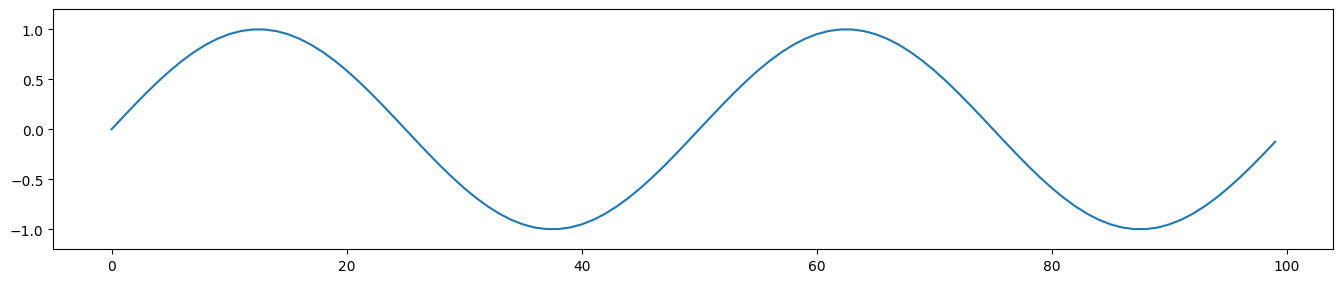

In [43]:
import numpy as np
import matplotlib.pyplot as plt

def createSample(freq, t_start, t_end, steps):
    w = 2*np.pi*freq #declaration of Omega for sinus
    final = np.linspace(t_start, t_end, steps, endpoint=False) #gets the values for all calculations (goes through every x and y)
    signal = np.sin(w*final) #creates the value for the sinus function
    #dein code
    return signal

#Plots
sampleAM = createSample(2, 0, 1, 100)

fig = plt.figure()
ax1 = fig.add_axes([0, 1, 2, 0.5], ylim=(-1.2, 1.2))
ax1.plot(sampleAM)

Beim Non-Return-to-Zero-Code wird jedem Bit ein binäres Signal zugeordnet (z.B. einem Zeichenwert '0' keine Modulation, '1' eine Modulation). Daher werden Folgen gleicher Bits entsprechend durch Folgen gleicher Signalwerte übertragen.
> **Aufgabe**: Wir haben ein Sample (Liste bestehend aus 100 Werten) das bei jedem Bit das gleich `1` ist eingesetzt wird. Ist ein Bit gleich `0` wird eine Liste aus Nullen eingesetzt. Für jedes Bit wird eine Liste aus 100 Werten hinzugefügt. Diese Funktion gibt eine Liste mit Listen zurück.

In [1]:
def sampleModulation(lst, sample):
    final = []
    
    for i in lst:
        if i == 0:
            final.append([0]*100) 
        else: 
            final.append(sample)
            
    #print(final)
    #dein code
    return final

#Tests
print(sampleModulation([0,1,0], [1] * 100) == [[0] * 100, [1] * 100, [0] * 100])
print(sampleModulation([1,1,0], [1] * 100) == [[1] * 100, [1] * 100, [0] * 100])

True
True


Die Funktion **sampleModulation()** gibt eine Liste mit Listen zurück. Die Aufgabe der nächsten Funktion ist es diese verschachtelten Listen zu einer Liste zu verschelzen.
> **Aufgabe**: Die Funiktion **flatten()** bekommt eine Liste aus Listen übergeben und gibt eine Liste zurück.

In [2]:
def flatten(lst):
    final = []

    for i in range (len(lst)):
        for j in range (len(lst[i])):
            final.append(lst[i][j])
           
    return final

#Tests
print(flatten([[1],[2],[4],[8],[16]]) == [1, 2, 4, 8, 16])
print(flatten([[0,0,0],[1,1,1],[0,0,0]]) ==  [0, 0, 0, 1, 1, 1, 0, 0, 0])

#Plots
modulation = flatten(sampleModulation(hamming, sampleAM))
hammingPlot = hamming.copy()

fig2 = plt.figure()
fig3 = plt.figure()

ax2 = fig2.add_axes([0, 1, 2, 0.2], ylim=(-0.2, 1.2))
ax3 = fig3.add_axes([0, 1, 2, 0.5], ylim=(-1.2, 1.2))

ax2.plot(np.repeat(hammingPlot, 100))
ax3.plot(modulation)

True
True


NameError: name 'hamming' is not defined

# 3. Demodulation

Die übertragenen Bits mussen nach der Übertragung wieder de-moduliert und später auch de-kodiert (Hamming) werden. 
Um festzustellen ob an einem bestimmten Moment eine `1` oder eine `0` übertragen wurde summieren wir in 100er Schritten die Übertragung. Mit einem _threshold_ (Schwelle) bewerten wir die einzelnen Intervalle und entscheiden ob es sich um eine `1` oder `0` handelt.

Die folgende Funktion unterteilt eine Liste alle **n** Elemente.
> **Aufgabe**: Diese Funktion erhält eine Ganzzahl **n** und eine Liste. Diese Liste wird zu einer Liste mit Sublisten der Länge **n**. Ein Beispiel mit **n** = 3:
$$[0,1,2,3,4,5,6,7,8,9] \rightarrow [[1,2,3],[4,5,6],[7,8,9]]$$

In [3]:
def splitEvery(n, lst):
    final = []
    temp = []
    
    for i in range(len(lst)):
        if len(temp) == n: #if it reaches length to append it
            final.append(temp)
            temp = [] #empty temp again

        temp.append(lst[i]) #every runthrough of the for adds to temp

    if len(temp) == n: #if the last list is the length of temp exactly on the last one in the list but doesnt get added anymore
        final.append(temp) #others if they dont meet the requirement get cut off
    #print(final)
    #dein code
    return final
    
#Tests
print(len(splitEvery(10, [1]*10)) == 1) 
print(len(splitEvery(10, [1]*100)) == 10)
print(len(splitEvery(100, [1]*701)) == 7)

True
True
True


Jetzt haben wir die Möglichkeit die empfangene Modulation in Intervallen zu unterteilen. Die nächste Funktion berechnet die Summe der jeweiligen Intervalle.
> **Aufgabe**: Erstelle die Funktion **sumIntervals(lst)** welche den Absolutwert (Betrag) jedes Elements in einem Intervall summiert. Diese Funktion gibt dann eine Liste mit der Summe der jeweiligen Intervalle zurück.
$$[[0,0,0],[1,2,3],[2,-2,-2]] \rightarrow [0,6,6]$$

_Tipp: Es müssen nicht alle Funktionen wie die Summe einer Liste händisch erstellt erstellt werden, du kannst dafür auch eine Library wie z.B np verwenden_

In [47]:
def sumIntervals(lst):
    final = []
    temp = 0

    for i in range (len(lst)):
        for j in range (len(lst[i])):
            temp = temp + abs(lst[i][j]) #abs() takes the absolute value of the variable

        final.append(temp) #appends the value the second
        temp = 0
    #print(final)
    #dein code
    return final

#Tests
print(sumIntervals([[0,0,0], [1,2,3], [2,-2,-2]]) == [0,6,6])
print(sumIntervals([[0,0,0], [1,1], []]) == [0,2,0])

True
True


Es wird noch eine Funktion benötigt, die diese Liste mit den Summen der einzelnen Intervalle in eine Liste bestehend aus 0 en und 1 en umwandelt. 
> **Aufgabe**: Dazu erstellen wir eine Funktion **threshold(lst, t)** mit den Argumenten **lst** die Liste und den threshold **t** (Ganzzahl). Wenn das Element der Liste grösser als **t** ist wird eine 1 gesetzt, ansonsten 0.

In [48]:
def threshold(lst, t):
    final = []

    for i in range (len(lst)):
        if lst[i] >= t: #if greater or same as t places 1 or 0
            final.append(1)
        else: 
            final.append(0)
    #print(final)
    #dein code
    return final

#Tests
print(threshold([1,2,3,4,5], 3) == [0,0,1,1,1])

True


Mit diesen Funktionen können wir die empfangene Modulation wieder zu einer Bitfolge umwandeln.

In [49]:
deModuliert = threshold(sumIntervals(splitEvery(100, modulation)), 30)
print(deModuliert)

[1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0]


# 4. Hamming Code (Dekodieren)
Jetzt haben wir die empfangenen Bits (noch Hamming-kodiert). Diese können jetzt mit den bereits erstellten Funktionen dekodiert werden.

In [50]:
deKodiert = binToIntList(addWithoutCarry(getIndicesOfOnes(deModuliert[::-1])))

Nun können wir überprüfen ob bei der "simulierten" Übertragung Fehler entstanden sind.

In [51]:
print("Hamming-kodiert: ", hamming)
print("De-moduliert:    ", deModuliert)
print("Fehler:          ", not(deModuliert == hamming))
print("Fehlerstelle, 0 = kein Fehler: ", deKodiert)

Hamming-kodiert:  [1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0]
De-moduliert:     [1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0]
Fehler:           False
Fehlerstelle, 0 = kein Fehler:  [0]


# 5. Übertragungsfehler Simulation
In dieser Aufgabe generieren wir einen "Bitflip" und schauen ob es möglich ist die Stelle des Fehlers herauszufinden.

> **Aufgabe**: Erstelle eine Funktion die an einer zufälligen Stelle der Liste einen Bitflip macht. Wie zum Beispiel:
$$[1, 0, 1, 0, 1, 0] \rightarrow [1, 1, 1, 0, 1, 0]$$

_Hinweis: randrange(n) gibt random Zahlen von 0 bis n-1_

In [52]:
from random import randrange

def randomBitFlip(lst):
    #print(lst)
    place = randrange(len(lst))
    number_of_place = lst[place]

    if number_of_place == 0:
        lst[place] = 1
    else:
        lst[place] = 0

    #print(lst)
    #dein code
    return lst

print("Übertragung Hammming kodiert:                 ", deModuliert)
modulationError = randomBitFlip(deModuliert)
print("Züfällig generierter Fehler:                  ", modulationError)
print("De-kodierung gibt Stelle von Fehler in binär: ", binToIntList(addWithoutCarry(getIndicesOfOnes(modulationError[::-1]))))

Übertragung Hammming kodiert:                  [1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0]
Züfällig generierter Fehler:                   [1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0]
De-kodierung gibt Stelle von Fehler in binär:  [1, 1, 0]
